### Reading the Dataset

In [1]:
# Image Path
img_path = "/users/sheelatookhy/Documents/Data_for_test/"

In [2]:
# List all the Categories
furniture_label = ['Bed','Chair','Sofa']

In [3]:
# Create dataframe of image path and categories 
import pandas as pd
import os
img_list = []
label_list = []
for label in furniture_label:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)
        
df = pd.DataFrame({'img':img_list, 'label':label_list})

In [4]:
# Create a dataframe from img_list and label_list columns
df.head()

,img,label
0,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed
1,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed
2,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed
3,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed
4,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed


### Data Exploration

In [5]:
# Count number of images of each furniture category
df['label'].value_counts()

Bed      100
Chair    100
Sofa     100
Name: label, dtype: int64

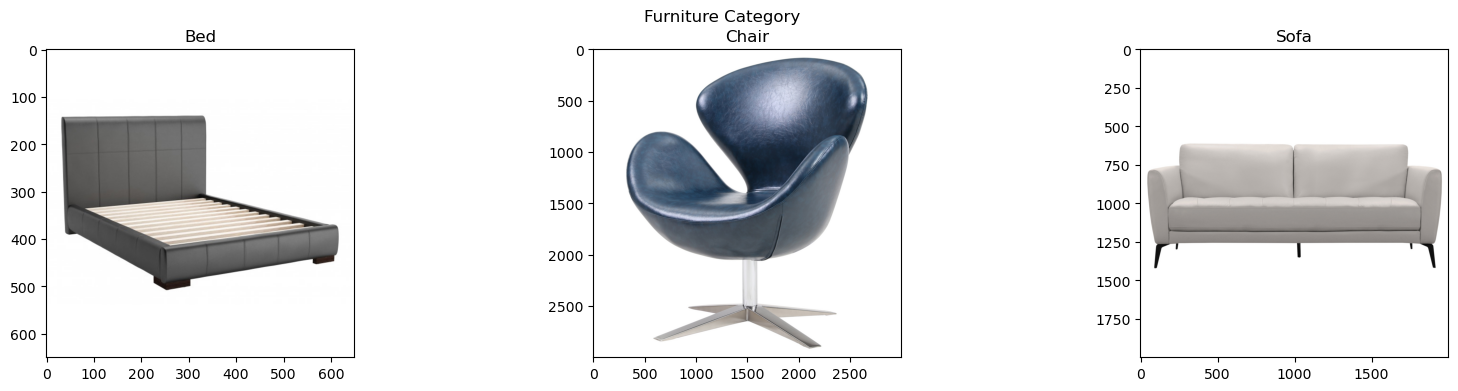

In [6]:
# Show sample images
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=len(furniture_label), figsize=(20,4))
fig.suptitle('Furniture Category')
random_num = 12
for i,label in enumerate(furniture_label):
    ax[i].set_title(label)
    ax[i].imshow(plt.imread(df[df['label']==label]['img'].iloc[random_num]))

In [7]:
# Image Shape
plt.imread(df['img'][0]).shape

(650, 650, 3)

### Data preprocessing

In [8]:
# Create a dataframe for mapping label
df_labels = {
    'Bed' : 0,
    'Chair' : 1,
    'Sofa' : 2,
}
# Encode
df['encode_label'] = df['label'].map(df_labels)
df.head()

,img,label,encode_label
0,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed,0
1,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed,0
2,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed,0
3,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed,0
4,/users/sheelatookhy/Documents/Data_for_test/Be...,Bed,0


In [9]:
# Input (X): image
import cv2
X = []
for img in df['img']:
    img = cv2.imread(str(img))
    # img = augment_function(img)
    img = cv2.resize(img, (96, 96))
    img = img/255
    X.append(img)

In [10]:
# Output (y): encoded label of each image
y = df['encode_label']

In [11]:
# Train/Validation/Test split
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

### Create a model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy

In [13]:
# Use VGG16 as a base model
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape=(96,96,3), include_top=False, weights='imagenet')

base_model.summary()

2023-02-22 21:37:05.394711: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 24, 24, 128)       0     

In [14]:
# VGG16 model parameters
for layer in base_model.layers:
    layer.trainable = False
base_model.layers[-2].trainable = True
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True

In [15]:
# Add layers to the model
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
model = Sequential()
model.add(Input(shape=(96,96,3)))
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(len(furniture_label), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 15,895,363
Trainable params: 8,260,099
Non-trainable params: 7,635,264
_____________________________________

### Train a model

In [16]:
train_data_dir = 'v_data/train'
validation_data_dir = 'v_data/test'
nb_train_samples =400
nb_validation_samples = 100
epochs = 10
batch_size = 16
img_width, img_height = 224, 224

In [17]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

AttributeError: module 'tensorflow.compat.v2.__internal__' has no attribute 'dispatch'

### Model evaluation

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
            optimizer='rmsprop',
            metrics=['accuracy'])

In [ ]:
model.save_weights('model_saved.h5')

In [ ]:
mnist = tf.keras.datasets.mnist  
num_class = 10

In [ ]:
# split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# reshape and normalize the data
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255

### Visualize the model

In [ ]:
df.plot.density()